# 002 EDA Transforms Workshop

IMPORT DEPENDENCIES

In [1]:
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

LOAD RAW & REFERENCE DATA

In [2]:
df_ref = pd.read_csv("data/data_clean.csv")
print(f"df_raw.columns: {df_ref.columns}")
df_ref.head()

df_raw.columns: Index(['condition', 'listing_type_id', 'price', 'buying_mode',
       'accepts_mercadopago', 'automatic_relist', 'status',
       'seller_address_longitude', 'seller_address_latitude',
       'shipping_local_pick_up', 'shipping_free_shipping', 'shipping_mode',
       'Year_created', 'Month_created', 'day_name_created', 'Hour_created',
       'Min_created', 'Month_updated', 'day_name_updated', 'Hour_updated',
       'Min_updated'],
      dtype='object')


,condition,listing_type_id,price,buying_mode,accepts_mercadopago,automatic_relist,status,seller_address_longitude,seller_address_latitude,shipping_local_pick_up,...,shipping_mode,Year_created,Month_created,day_name_created,Hour_created,Min_created,Month_updated,day_name_updated,Hour_updated,Min_updated
0,new,bronze,80.0,buy_it_now,True,False,active,-58.398671,-34.628070,True,...,not_specified,2015,September,Saturday,20,42,September,Saturday,20,42
1,used,silver,2650.0,buy_it_now,True,False,active,-58.505917,-34.593552,True,...,me2,2015,September,Saturday,18,8,September,Saturday,18,8
2,used,bronze,60.0,buy_it_now,True,False,active,-58.414395,-34.623391,True,...,me2,2015,September,Wednesday,23,57,September,Wednesday,23,57
3,new,silver,580.0,buy_it_now,True,False,active,-58.492921,-34.628189,True,...,me2,2015,September,Monday,18,47,October,Monday,16,3
4,used,bronze,30.0,buy_it_now,True,False,active,-58.549504,-34.634655,True,...,not_specified,2015,August,Monday,22,7,August,Friday,13,37


In [3]:
df_raw = pd.read_json("data/MLA_100k.jsonlines",lines=True)
print(f"len(df_raw): {len(df_raw)}")
print(f"df_raw.columns: {df_raw.columns}")
df_raw.head()

len(df_raw): 100000
df_raw.columns: Index(['seller_address', 'warranty', 'sub_status', 'condition',
       'seller_contact', 'deal_ids', 'base_price', 'shipping',
       'non_mercado_pago_payment_methods', 'seller_id', 'variations',
       'location', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'geolocation', 'sold_quantity', 'available_quantity'],
      dtype='object')


,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,...,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",None,[],new,None,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,...,active,None,NaN,NaN,1,2015-09-05 20:42:53+00:00,http://articulo.mercadolibre.com.ar/MLA-578052...,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",NUESTRA REPUTACION,[],used,None,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,...,active,None,NaN,NaN,1,2015-09-26 18:08:30+00:00,http://articulo.mercadolibre.com.ar/MLA-581565...,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",None,[],used,None,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,...,active,None,NaN,NaN,1,2015-09-09 23:57:07+00:00,http://articulo.mercadolibre.com.ar/MLA-578780...,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1
3,"{'comment': '', 'longitude': -58.4929208, 'id'...",None,[],new,None,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",143001605,...,active,None,NaN,NaN,1,2015-09-28 18:47:56+00:00,http://articulo.mercadolibre.com.ar/MLA-581877...,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1
4,"{'comment': '', 'longitude': -58.5495042, 'id'...",MI REPUTACION.,[],used,None,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",96873449,...,active,None,NaN,NaN,1,2015-08-24 22:07:20+00:00,http://articulo.mercadolibre.com.ar/MLA-576112...,"{'latitude': -34.6346547, 'longitude': -58.549...",0,1


EDA GENERAL INFO

In [4]:
print(df_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   seller_address                    100000 non-null  object             
 1   warranty                          39104 non-null   object             
 2   sub_status                        100000 non-null  object             
 3   condition                         100000 non-null  object             
 4   seller_contact                    2219 non-null    object             
 5   deal_ids                          100000 non-null  object             
 6   base_price                        100000 non-null  float64            
 7   shipping                          100000 non-null  object             
 8   non_mercado_pago_payment_methods  100000 non-null  object             
 9   seller_id                         100000 non-null

In [5]:
for column in df_raw.columns:
    print(f"Column: {column}")
    print(f"Missing Values: {df_raw[column].isnull().sum()} / {len(df_raw)} ({df_raw[column].isnull().sum() / len(df_raw) * 100:.2f}%)")
    # print(f"Unique Values: {df_raw[column].nunique()}")
    print(f"Type Variable: {df_raw[column].dtype}")
    print("-" * 40)

Column: seller_address
Missing Values: 0 / 100000 (0.00%)
Type Variable: object
----------------------------------------
Column: warranty
Missing Values: 60896 / 100000 (60.90%)
Type Variable: object
----------------------------------------
Column: sub_status
Missing Values: 0 / 100000 (0.00%)
Type Variable: object
----------------------------------------
Column: condition
Missing Values: 0 / 100000 (0.00%)
Type Variable: object
----------------------------------------
Column: seller_contact
Missing Values: 97781 / 100000 (97.78%)
Type Variable: object
----------------------------------------
Column: deal_ids
Missing Values: 0 / 100000 (0.00%)
Type Variable: object
----------------------------------------
Column: base_price
Missing Values: 0 / 100000 (0.00%)
Type Variable: float64
----------------------------------------
Column: shipping
Missing Values: 0 / 100000 (0.00%)
Type Variable: object
----------------------------------------
Column: non_mercado_pago_payment_methods
Missing Val

**FIRST DROP OF VARIABLES DUE TO MISSING VALUES OR NOT MEANINGFULL COLUMNS**

**Note:** Images attached due to the help of [Data Wrangler Extension](https://marketplace.visualstudio.com/items?itemName=ms-toolsai.datawrangler).
| Variable     | Description                                                                 | Image                                                                 |
|--------------|-----------------------------------------------------------------------------|-----------------------------------------------------------------------------|
| **warranty** | High possibilities of being comments related to the product. Most of it are missing (60.90%).| 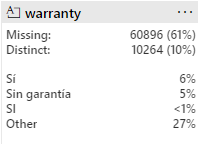|
| **sub_status** | Most values are empty (~99%) rows ([]) | 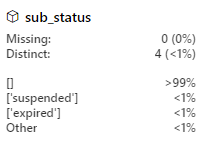| 
| **seller_contact** | Most values are missing (97.78%) | 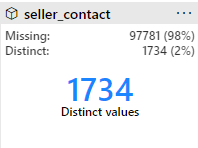|
| **deal_ids** | Most values are empty (~99%) rows ([]) | 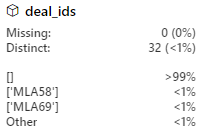|
| **variations** | Most values are (~92%) rows ([]) | 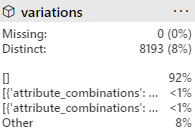|
| **location** | Most values are (~98%) rows ({}) | 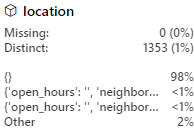|
| **attributes** | Most values are empty ~88% rows ([]) | 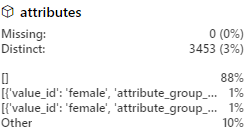|
| **international_delivery_mode** | Full rows (100%) (none) | 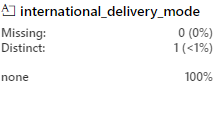|
| **official_store_id** | Most values are missing (~99%) | 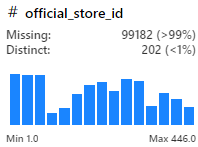|
| **differential_pricing** | Empty rows (100%) () | 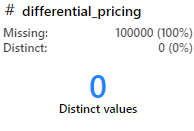|
| **video_id** | Most values are missing (~97%) | 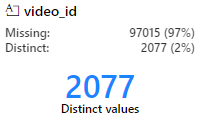|
| **catalog_product_id** | Most values are missing (~99%) | 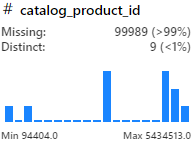|
| **subtitle** | Empty rows (100%) () | 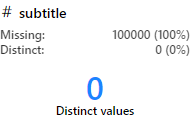|
| **listing_source** | Empty rows (100%) () | 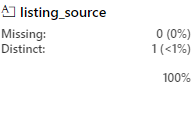|
| **coverage_areas** | Empty list rows (100%) () | 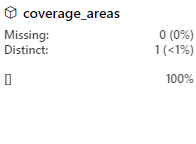|


In [6]:
df_raw = df_raw.drop(columns=['warranty', 'sub_status', 'seller_contact', 'deal_ids', 'variations', 
                              'location', 'attributes', 'international_delivery_mode', 
                              'official_store_id', 'differential_pricing', 'video_id', 'catalog_product_id', 'subtitle', 'listing_source','coverage_areas'])
df_raw.head()

,seller_address,condition,base_price,shipping,non_mercado_pago_payment_methods,seller_id,site_id,listing_type_id,price,buying_mode,...,date_created,secure_thumbnail,stop_time,status,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",new,80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,MLA,bronze,80.0,buy_it_now,...,2015-09-05T20:42:53.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-04 20:42:53+00:00,active,1,2015-09-05 20:42:53+00:00,http://articulo.mercadolibre.com.ar/MLA-578052...,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",used,2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,MLA,silver,2650.0,buy_it_now,...,2015-09-26T18:08:30.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-25 18:08:30+00:00,active,1,2015-09-26 18:08:30+00:00,http://articulo.mercadolibre.com.ar/MLA-581565...,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",used,60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,MLA,bronze,60.0,buy_it_now,...,2015-09-09T23:57:07.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-08 23:57:07+00:00,active,1,2015-09-09 23:57:07+00:00,http://articulo.mercadolibre.com.ar/MLA-578780...,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1
3,"{'comment': '', 'longitude': -58.4929208, 'id'...",new,580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",143001605,MLA,silver,580.0,buy_it_now,...,2015-09-28T18:47:56.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,2015-12-04 01:13:16+00:00,active,1,2015-09-28 18:47:56+00:00,http://articulo.mercadolibre.com.ar/MLA-581877...,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1
4,"{'comment': '', 'longitude': -58.5495042, 'id'...",used,30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",96873449,MLA,bronze,30.0,buy_it_now,...,2015-08-24T22:07:20.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,2015-10-23 22:07:20+00:00,active,1,2015-08-24 22:07:20+00:00,http://articulo.mercadolibre.com.ar/MLA-576112...,"{'latitude': -34.6346547, 'longitude': -58.549...",0,1


CLEANING & TRANSFORM FUNCTIONS

In [7]:
# Check for missing values and frequency of the most common values
def show_most_frequent_values(df, columns=None, top_n=5):
    if columns is None:
        columns = df.columns
    for column in columns:
        try:
            print(f"Column: {column}")
            # Convert column to string if it contains non-1-dimensional data
            if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
                df[column] = df[column].apply(str)
            print(df[column].value_counts().head(top_n))
            print("\n")
        except ValueError as e:
            print(f"Could not process column {column}: {e}")
            print("\n")

# Convert to dictionary
def convert_to_dict(value):
    if isinstance(value, dict):
        return value
    try:
        return json.loads(value)
    except (TypeError, json.JSONDecodeError):
        return ""
    
# Detect columns with list or dictionary values
def detect_col_type(df):
    columnas_con_list = []
    columnas_con_dict = []
    for column in df.columns:
        if df[column].apply(lambda x: isinstance(x, list)).any():
            columnas_con_list.append(column)
        if df[column].apply(lambda x: isinstance(x, dict)).any():
            columnas_con_dict.append(column)
    return columnas_con_list, columnas_con_dict

#Standardize / Transform Date Columns
def transform_date_by_range(df, date_col):

    df[date_col] = pd.to_datetime(df[date_col])
    df[date_col+'_year'] = df[date_col].dt.year
    df[date_col+'_month'] = df[date_col].dt.month
    df[date_col+'_day'] = df[date_col].dt.day
    df[date_col+'_hour'] = df[date_col].dt.hour
    
    #Mapping month and day
    month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
    day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
    
    df[date_col+'_month'] = df[date_col].dt.month.map(month_map)
    df[date_col+'_day'] = df[date_col].dt.dayofweek.map(day_map)
    df[date_col+'_minute'] = df[date_col].dt.minute
    df = df.drop(columns=[date_col])
    return df

In [8]:
col_list,col_dict  = detect_col_type(df_raw)
print(f"Columns type list:{col_list}")
print(f"Columns type dict:{col_dict} ")

Columns type list:['non_mercado_pago_payment_methods', 'tags', 'descriptions', 'pictures']
Columns type dict:['seller_address', 'shipping', 'geolocation'] 


Flatten Transforms wiil be applied for this columns in orden to flatten the content

**TRANSFORM DATE COLUMNS BY DATE RANGES**

**Note:** Images attached due to the help of [Data Wrangler Extension](https://marketplace.visualstudio.com/items?itemName=ms-toolsai.datawrangler).
| Variable     | Description                                                                 | Image                                                                 |
|--------------|-----------------------------------------------------------------------------|-----------------------------------------------------------------------------|
| **stop_time** | Date format split it by year-month-day-hour-minute | 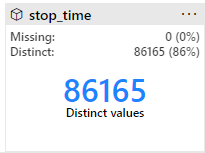|
| **start_time** | Date format split it by year-month-day-hour-minute | 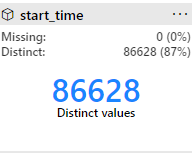| 
| **date_created** | Date format split it by year-month-day-hour-minute | 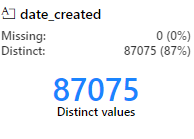| 
| **last_updated** | Date format split it by year-month-day-hour-minute | 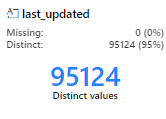| 

In [9]:
df_raw = transform_date_by_range(df_raw, 'start_time')
df_raw = transform_date_by_range(df_raw, 'stop_time')
df_raw = transform_date_by_range(df_raw, 'date_created')
df_raw = transform_date_by_range(df_raw, 'last_updated')

df_raw.head()

,seller_address,condition,base_price,shipping,non_mercado_pago_payment_methods,seller_id,site_id,listing_type_id,price,buying_mode,...,date_created_year,date_created_month,date_created_day,date_created_hour,date_created_minute,last_updated_year,last_updated_month,last_updated_day,last_updated_hour,last_updated_minute
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",new,80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,MLA,bronze,80.0,buy_it_now,...,2015,September,Saturday,20,42,2015,September,Saturday,20,42
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",used,2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,MLA,silver,2650.0,buy_it_now,...,2015,September,Saturday,18,8,2015,September,Saturday,18,8
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",used,60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,MLA,bronze,60.0,buy_it_now,...,2015,September,Wednesday,23,57,2015,September,Wednesday,23,57
3,"{'comment': '', 'longitude': -58.4929208, 'id'...",new,580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",143001605,MLA,silver,580.0,buy_it_now,...,2015,September,Monday,18,47,2015,October,Monday,16,3
4,"{'comment': '', 'longitude': -58.5495042, 'id'...",used,30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",96873449,MLA,bronze,30.0,buy_it_now,...,2015,August,Monday,22,7,2015,August,Friday,13,37


In [10]:
df_raw['shipping'] = df_raw['shipping'].apply(convert_to_dict)

# Flatten the shipping column
expanded_df = pd.json_normalize(df_raw['shipping'])
df_raw = pd.concat([df_raw.drop(columns=['shipping']), expanded_df], axis=1)

df_raw

,seller_address,condition,base_price,non_mercado_pago_payment_methods,seller_id,site_id,listing_type_id,price,buying_mode,tags,...,last_updated_day,last_updated_hour,last_updated_minute,local_pick_up,methods,tags,free_shipping,mode,dimensions,free_methods
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",new,80.0,"[{'description': 'Transferencia bancaria', 'id...",74952096,MLA,bronze,80.0,buy_it_now,[dragged_bids_and_visits],...,Saturday,20,42,True,[],[],False,not_specified,None,NaN
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",used,2650.0,"[{'description': 'Transferencia bancaria', 'id...",42093335,MLA,silver,2650.0,buy_it_now,[],...,Saturday,18,8,True,[],[],False,me2,None,NaN
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",used,60.0,"[{'description': 'Transferencia bancaria', 'id...",133384258,MLA,bronze,60.0,buy_it_now,[dragged_bids_and_visits],...,Wednesday,23,57,True,[],[],False,me2,None,NaN
3,"{'comment': '', 'longitude': -58.4929208, 'id'...",new,580.0,"[{'description': 'Transferencia bancaria', 'id...",143001605,MLA,silver,580.0,buy_it_now,[],...,Monday,16,3,True,[],[],False,me2,None,NaN
4,"{'comment': '', 'longitude': -58.5495042, 'id'...",used,30.0,"[{'description': 'Transferencia bancaria', 'id...",96873449,MLA,bronze,30.0,buy_it_now,[dragged_bids_and_visits],...,Friday,13,37,True,[],[],False,not_specified,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,"{'comment': '', 'longitude': -58.6142895, 'id'...",used,30.0,"[{'description': 'Transferencia bancaria', 'id...",86277472,MLA,free,30.0,buy_it_now,[dragged_bids_and_visits],...,Monday,1,5,True,[],[],False,me2,None,NaN
99996,"{'comment': '', 'longitude': '', 'id': 1114571...",new,239.0,"[{'description': 'Tarjeta de crédito', 'id': '...",120301324,MLA,bronze,239.0,buy_it_now,[],...,Friday,18,9,False,[],[],False,not_specified,None,NaN
99997,"{'comment': '', 'longitude': -58.6241199, 'id'...",used,600.0,[],12147240,MLA,bronze,600.0,buy_it_now,[],...,Sunday,22,29,False,[],[],False,me2,None,NaN
99998,"{'comment': '', 'longitude': -58.4020374, 'id'...",used,50.0,"[{'description': 'Transferencia bancaria', 'id...",86102489,MLA,bronze,50.0,buy_it_now,[dragged_bids_and_visits],...,Tuesday,17,23,True,[],[],False,me2,None,NaN


**DROP VARIABLES DUE TO MISSING VALUES OR NOT MEANINGFULL COLUMNS AT SHIPPING DICT**

**Note:** Images attached due to the help of [Data Wrangler Extension](https://marketplace.visualstudio.com/items?itemName=ms-toolsai.datawrangler).
| Variable     | Description                                                                 | Image                                                                 |
|--------------|-----------------------------------------------------------------------------|-----------------------------------------------------------------------------|
| **methods** | Missing values ([]).| 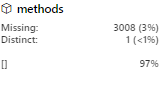|
| **tags** | Missing values (~99%) ([]).|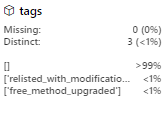|
| **free_methods** | Missing values (~97%).|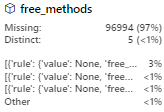|
| **dimensions** | Missing values (~99%).| 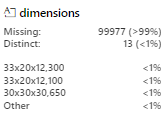|



In [11]:
columns_to_analyze = ["methods","tags","free_methods","dimensions"]
show_most_frequent_values(df_raw, columns=columns_to_analyze)

Column: methods
methods
[]      96992
nan      3006
None        2
Name: count, dtype: int64


Column: tags
Could not process column tags: Grouper for 'tags' not 1-dimensional


Column: free_methods
free_methods
nan                                                                  96994
[{'rule': {'value': None, 'free_mode': 'country'}, 'id': 73328}]      2955
[{'rule': {'value': None, 'free_mode': 'country'}, 'id': 73330}]        40
[{'rule': {'value': None, 'free_mode': 'country'}, 'id': 501145}]        6
[{'rule': {'value': None, 'free_mode': 'country'}, 'id': 501146}]        4
Name: count, dtype: int64


Column: dimensions
dimensions
33x20x12,300    4
33x20x12,100    3
30x30x30,650    3
33x20x12,400    2
33x20x12,80     2
Name: count, dtype: int64




In [12]:
df_raw = df_raw.drop(columns=["methods","tags","free_methods","dimensions"])
df_raw.head()

,seller_address,condition,base_price,non_mercado_pago_payment_methods,seller_id,site_id,listing_type_id,price,buying_mode,parent_item_id,...,date_created_hour,date_created_minute,last_updated_year,last_updated_month,last_updated_day,last_updated_hour,last_updated_minute,local_pick_up,free_shipping,mode
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",new,80.0,"[{'description': 'Transferencia bancaria', 'id...",74952096,MLA,bronze,80.0,buy_it_now,MLA568261029,...,20,42,2015,September,Saturday,20,42,True,False,not_specified
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",used,2650.0,"[{'description': 'Transferencia bancaria', 'id...",42093335,MLA,silver,2650.0,buy_it_now,MLA561574487,...,18,8,2015,September,Saturday,18,8,True,False,me2
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",used,60.0,"[{'description': 'Transferencia bancaria', 'id...",133384258,MLA,bronze,60.0,buy_it_now,MLA568881256,...,23,57,2015,September,Wednesday,23,57,True,False,me2
3,"{'comment': '', 'longitude': -58.4929208, 'id'...",new,580.0,"[{'description': 'Transferencia bancaria', 'id...",143001605,MLA,silver,580.0,buy_it_now,None,...,18,47,2015,October,Monday,16,3,True,False,me2
4,"{'comment': '', 'longitude': -58.5495042, 'id'...",used,30.0,"[{'description': 'Transferencia bancaria', 'id...",96873449,MLA,bronze,30.0,buy_it_now,MLA566354576,...,22,7,2015,August,Friday,13,37,True,False,not_specified


In [13]:
df_raw['seller_address'] = df_raw['seller_address'].apply(convert_to_dict)

# Flatten the seller_address column
expanded_df = pd.json_normalize(df_raw['seller_address'])
df_raw = pd.concat([df_raw.drop(columns=['seller_address']), expanded_df], axis=1)
df_raw

,condition,base_price,non_mercado_pago_payment_methods,seller_id,site_id,listing_type_id,price,buying_mode,parent_item_id,category_id,...,search_location.neighborhood.name,search_location.neighborhood.id,search_location.state.name,search_location.state.id,search_location.city.name,search_location.city.id,city.name,city.id,state.name,state.id
0,new,80.0,"[{'description': 'Transferencia bancaria', 'id...",74952096,MLA,bronze,80.0,buy_it_now,MLA568261029,MLA126406,...,San Cristóbal,TUxBQlNBTjkwNTZa,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,TUxBQ0NBUGZlZG1sYQ,San Cristóbal,TUxBQlNBTjkwNTZa,Capital Federal,AR-C
1,used,2650.0,"[{'description': 'Transferencia bancaria', 'id...",42093335,MLA,silver,2650.0,buy_it_now,MLA561574487,MLA10267,...,Villa Devoto,TUxBQlZJTDYzNzZa,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,TUxBQ0NBUGZlZG1sYQ,Buenos Aires,,Capital Federal,AR-C
2,used,60.0,"[{'description': 'Transferencia bancaria', 'id...",133384258,MLA,bronze,60.0,buy_it_now,MLA568881256,MLA1227,...,Boedo,TUxBQkJPRTQ0OTRa,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,TUxBQ0NBUGZlZG1sYQ,Boedo,TUxBQkJPRTQ0OTRa,Capital Federal,AR-C
3,new,580.0,"[{'description': 'Transferencia bancaria', 'id...",143001605,MLA,silver,580.0,buy_it_now,None,MLA86345,...,Floresta,TUxBQkZMTzg5MjFa,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,TUxBQ0NBUGZlZG1sYQ,Floresta,TUxBQkZMTzg5MjFa,Capital Federal,AR-C
4,used,30.0,"[{'description': 'Transferencia bancaria', 'id...",96873449,MLA,bronze,30.0,buy_it_now,MLA566354576,MLA41287,...,,,Bs.As. G.B.A. Oeste,TUxBUEdSQWVmNTVm,Tres de febrero,TUxBQ1RSRTMxODE5NA,Tres de febrero,TUxBQ1RSRTMxODE5NA,Buenos Aires,AR-B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,used,30.0,"[{'description': 'Transferencia bancaria', 'id...",86277472,MLA,free,30.0,buy_it_now,MLA574054280,MLA41287,...,,,,,,,Don Torcuato,,Buenos Aires,AR-B
99996,new,239.0,"[{'description': 'Tarjeta de crédito', 'id': '...",120301324,MLA,bronze,239.0,buy_it_now,MLA546779779,MLA1614,...,,,Bs.As. G.B.A. Sur,TUxBUEdSQXJlMDNm,Lomas de Zamora,TUxBQ0xPTWMwNjk3,Lomas de Zamora,TUxBQ0xPTWMwNjk3,Buenos Aires,AR-B
99997,used,600.0,[],12147240,MLA,bronze,600.0,buy_it_now,None,MLA24696,...,,,Bs.As. G.B.A. Oeste,TUxBUEdSQWVmNTVm,Morón,TUxBQ01PUmI1NTBj,Morón,TUxBQ01PUmI1NTBj,Buenos Aires,AR-B
99998,used,50.0,"[{'description': 'Transferencia bancaria', 'id...",86102489,MLA,bronze,50.0,buy_it_now,MLA565452340,MLA34202,...,Balvanera,TUxBQkJBTDMxMDZa,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,TUxBQ0NBUGZlZG1sYQ,Balvanera,TUxBQkJBTDMxMDZa,Capital Federal,AR-C


**DROP VARIABLES DUE TO MISSING VALUES OR NOT MEANINGFULL COLUMNS AT SELLER_ADDRESS DICT**

| Variable                               | Description       | Image                              |
|----------------------------------------|-------------------|------------------------------------|
| **state.id**                           |Geolocation Data Non Relevant Feature. Dropped.|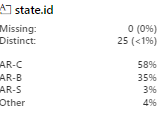 |
| **state.name**                         | Geolocation Data Non Relevant Feature. Dropped.|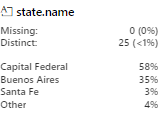 |
| **city.id**                            | Geolocation Data Non Relevant Feature. Dropped.|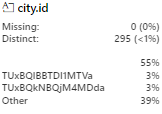 |
| **city.name**                          | Geolocation Data Non Relevant Feature. Dropped.|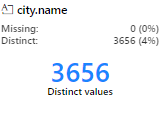 |
| **search_location.city.id**            | Geolocation Data Non Relevant Feature. Dropped.|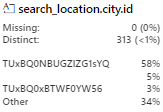 |
| **search_location.city.name**          | Geolocation Data Non Relevant Feature. Dropped.|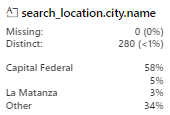|
| **search_location.state.name**         | Geolocation Data Non Relevant Feature. Dropped.|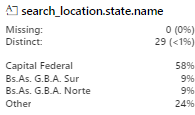 |
| **search_location.neighborhood.id**    | Geolocation Data Non Relevant Feature. Dropped.|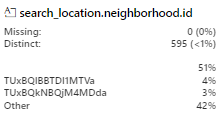 |
| **search_location.neighborhood.name**  | Geolocation Data Non Relevant Feature. Dropped.| 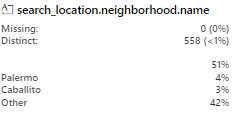 |
| **country.id**                         | Geolocation Data Non Relevant Feature. Dropped.|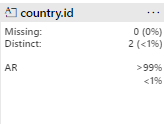 |
| **country.name**                       | Geolocation Data Non Relevant Feature. Dropped.| 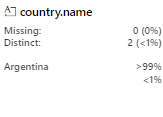 |
| **zip_code**                           | Missing values.   | 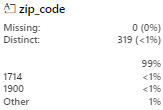 |
| **address_line**                       | Missing values.   |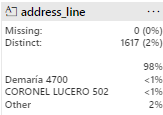 |
| **search_location.state.id**           | Geolocation Data Non Relevant Feature. Dropped.| 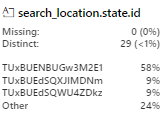 |


In [14]:
columns_to_analyze = ["state.id","state.name","city.id","city.name","search_location.city.id",
                              "search_location.city.name","search_location.state.name","search_location.neighborhood.id",
                              "search_location.neighborhood.name","country.id","country.name","zip_code","address_line","search_location.state.id"]
show_most_frequent_values(df_raw, columns=columns_to_analyze)

Column: state.id
state.id
AR-C    57854
AR-B    35013
AR-S     2672
AR-X     1908
AR-M      450
Name: count, dtype: int64


Column: state.name
state.name
Capital Federal    57854
Buenos Aires       35013
Santa Fe            2672
Córdoba             1908
Mendoza              450
Name: count, dtype: int64


Column: city.id
city.id
                    54574
TUxBQlBBTDI1MTVa     3305
TUxBQkNBQjM4MDda     2909
TUxBQkJFTDcyNTJa     2234
TUxBQ1JPUzg1Yjg3     1790
Name: count, dtype: int64


Column: city.name
city.name
CABA               4098
Buenos Aires       3420
Capital Federal    3402
Palermo            3355
Caballito          2967
Name: count, dtype: int64


Column: search_location.city.id
search_location.city.id
TUxBQ0NBUGZlZG1sYQ    58296
                       4709
TUxBQ0xBTWF0YW56       2838
TUxBQ1ZJQ2E3MTQz       2558
TUxBQ1NBTjg4ZmJk       2218
Name: count, dtype: int64


Column: search_location.city.name
search_location.city.name
Capital Federal    58296
                    4709
L

In [15]:
df_raw = df_raw.drop(columns=["state.id","state.name","city.id","city.name","search_location.city.id",
                              "search_location.city.name","search_location.state.name","search_location.neighborhood.id",
                              "search_location.neighborhood.name","country.id","country.name","zip_code","address_line","search_location.state.id"])
df_raw.head()

,condition,base_price,non_mercado_pago_payment_methods,seller_id,site_id,listing_type_id,price,buying_mode,parent_item_id,category_id,...,last_updated_day,last_updated_hour,last_updated_minute,local_pick_up,free_shipping,mode,comment,longitude,id,latitude
0,new,80.0,"[{'description': 'Transferencia bancaria', 'id...",74952096,MLA,bronze,80.0,buy_it_now,MLA568261029,MLA126406,...,Saturday,20,42,True,False,not_specified,,-58.398671,78162842,-34.62807
1,used,2650.0,"[{'description': 'Transferencia bancaria', 'id...",42093335,MLA,silver,2650.0,buy_it_now,MLA561574487,MLA10267,...,Saturday,18,8,True,False,me2,,-58.505917,105272448,-34.593552
2,used,60.0,"[{'description': 'Transferencia bancaria', 'id...",133384258,MLA,bronze,60.0,buy_it_now,MLA568881256,MLA1227,...,Wednesday,23,57,True,False,me2,,-58.414395,103489016,-34.623391
3,new,580.0,"[{'description': 'Transferencia bancaria', 'id...",143001605,MLA,silver,580.0,buy_it_now,None,MLA86345,...,Monday,16,3,True,False,me2,,-58.492921,109827639,-34.628189
4,used,30.0,"[{'description': 'Transferencia bancaria', 'id...",96873449,MLA,bronze,30.0,buy_it_now,MLA566354576,MLA41287,...,Friday,13,37,True,False,not_specified,,-58.549504,2825909,-34.634655


In [16]:
df_raw['non_mercado_pago_payment_methods'] = df_raw['non_mercado_pago_payment_methods'].apply(convert_to_dict)

# Flatten the non_mercado_pago_payment_methods column
expanded_df = pd.json_normalize(df_raw['non_mercado_pago_payment_methods'])
df_raw = pd.concat([df_raw.drop(columns=['non_mercado_pago_payment_methods']), expanded_df], axis=1)
df_raw 

,condition,base_price,seller_id,site_id,listing_type_id,price,buying_mode,parent_item_id,category_id,descriptions,...,last_updated_day,last_updated_hour,last_updated_minute,local_pick_up,free_shipping,mode,comment,longitude,id,latitude
0,new,80.0,74952096,MLA,bronze,80.0,buy_it_now,MLA568261029,MLA126406,[{'id': 'MLA578052519-912855983'}],...,Saturday,20,42,True,False,not_specified,,-58.398671,78162842,-34.62807
1,used,2650.0,42093335,MLA,silver,2650.0,buy_it_now,MLA561574487,MLA10267,[{'id': 'MLA581565358-930764806'}],...,Saturday,18,8,True,False,me2,,-58.505917,105272448,-34.593552
2,used,60.0,133384258,MLA,bronze,60.0,buy_it_now,MLA568881256,MLA1227,[{'id': 'MLA578780872-916478256'}],...,Wednesday,23,57,True,False,me2,,-58.414395,103489016,-34.623391
3,new,580.0,143001605,MLA,silver,580.0,buy_it_now,None,MLA86345,[{'id': 'MLA581877385-932309698'}],...,Monday,16,3,True,False,me2,,-58.492921,109827639,-34.628189
4,used,30.0,96873449,MLA,bronze,30.0,buy_it_now,MLA566354576,MLA41287,[{'id': 'MLA576112692-902981678'}],...,Friday,13,37,True,False,not_specified,,-58.549504,2825909,-34.634655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,used,30.0,86277472,MLA,free,30.0,buy_it_now,MLA574054280,MLA41287,[{'id': 'MLA581735252-931637959'}],...,Monday,1,5,True,False,me2,,-58.614289,100249156,-34.489321
99996,new,239.0,120301324,MLA,bronze,239.0,buy_it_now,MLA546779779,MLA1614,[{'id': 'MLA579045843-917988491'}],...,Friday,18,9,False,False,not_specified,,,111457162,
99997,used,600.0,12147240,MLA,bronze,600.0,buy_it_now,None,MLA24696,[{'id': 'MLA578170688-913473882'}],...,Sunday,22,29,False,False,me2,,-58.62412,155318978,-34.646786
99998,used,50.0,86102489,MLA,bronze,50.0,buy_it_now,MLA565452340,MLA34202,[{'id': 'MLA575062152-897880642'}],...,Tuesday,17,23,True,False,me2,,-58.402037,100755574,-34.610009


**DROP VARIABLES DUE TO MISSING VALUES OR NOT MEANINGFULL COLUMNS AT non_mercado_pago_payment_methods DICT**

| Variable                               | Description       | Image                              |
|----------------------------------------|-------------------|------------------------------------|
| **state.id**                           |Unique numerical data not consider relevant. Dropped.|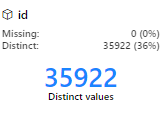 |
| **state.name**                         | Missing values.|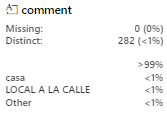 |


In [17]:
columns_to_analyze = ["comment","id"]
show_most_frequent_values(df_raw, columns=columns_to_analyze)

Column: comment
comment
                                             99601
casa                                            18
LOCAL A LA CALLE                                17
PB                                              12
Complejo North Coral Plaza, Piso 3, OF307       10
Name: count, dtype: int64


Column: id
Could not process column id: Grouper for 'id' not 1-dimensional




In [18]:
df_raw = df_raw.drop(columns=["comment","id"])
df_raw.head()

,condition,base_price,seller_id,site_id,listing_type_id,price,buying_mode,parent_item_id,category_id,descriptions,...,last_updated_year,last_updated_month,last_updated_day,last_updated_hour,last_updated_minute,local_pick_up,free_shipping,mode,longitude,latitude
0,new,80.0,74952096,MLA,bronze,80.0,buy_it_now,MLA568261029,MLA126406,[{'id': 'MLA578052519-912855983'}],...,2015,September,Saturday,20,42,True,False,not_specified,-58.398671,-34.62807
1,used,2650.0,42093335,MLA,silver,2650.0,buy_it_now,MLA561574487,MLA10267,[{'id': 'MLA581565358-930764806'}],...,2015,September,Saturday,18,8,True,False,me2,-58.505917,-34.593552
2,used,60.0,133384258,MLA,bronze,60.0,buy_it_now,MLA568881256,MLA1227,[{'id': 'MLA578780872-916478256'}],...,2015,September,Wednesday,23,57,True,False,me2,-58.414395,-34.623391
3,new,580.0,143001605,MLA,silver,580.0,buy_it_now,None,MLA86345,[{'id': 'MLA581877385-932309698'}],...,2015,October,Monday,16,3,True,False,me2,-58.492921,-34.628189
4,used,30.0,96873449,MLA,bronze,30.0,buy_it_now,MLA566354576,MLA41287,[{'id': 'MLA576112692-902981678'}],...,2015,August,Friday,13,37,True,False,not_specified,-58.549504,-34.634655


In [19]:
columns_to_analyze = ["geolocation","original_price","pictures", "descriptions"]
show_most_frequent_values(df_raw, columns=columns_to_analyze)

Column: geolocation
geolocation
{'latitude': -34.6037232, 'longitude': -58.3815931}    6152
{'latitude': '', 'longitude': ''}                      5155
{'latitude': -34.6719346, 'longitude': -58.5000147}    1000
{'latitude': -34.6036844, 'longitude': -58.3815591}     964
{'latitude': -34.5762063, 'longitude': -58.4323682}     933
Name: count, dtype: int64


Column: original_price
original_price
599.0    4
350.0    4
449.0    4
850.0    3
750.0    3
Name: count, dtype: int64


Column: pictures
pictures
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [20]:
#Variables drop due to not relvant information for the model
df_raw = df_raw.drop(columns=["geolocation","original_price","pictures", "descriptions"])
df_raw.head()

,condition,base_price,seller_id,site_id,listing_type_id,price,buying_mode,parent_item_id,category_id,accepts_mercadopago,...,last_updated_year,last_updated_month,last_updated_day,last_updated_hour,last_updated_minute,local_pick_up,free_shipping,mode,longitude,latitude
0,new,80.0,74952096,MLA,bronze,80.0,buy_it_now,MLA568261029,MLA126406,True,...,2015,September,Saturday,20,42,True,False,not_specified,-58.398671,-34.62807
1,used,2650.0,42093335,MLA,silver,2650.0,buy_it_now,MLA561574487,MLA10267,True,...,2015,September,Saturday,18,8,True,False,me2,-58.505917,-34.593552
2,used,60.0,133384258,MLA,bronze,60.0,buy_it_now,MLA568881256,MLA1227,True,...,2015,September,Wednesday,23,57,True,False,me2,-58.414395,-34.623391
3,new,580.0,143001605,MLA,silver,580.0,buy_it_now,None,MLA86345,True,...,2015,October,Monday,16,3,True,False,me2,-58.492921,-34.628189
4,used,30.0,96873449,MLA,bronze,30.0,buy_it_now,MLA566354576,MLA41287,True,...,2015,August,Friday,13,37,True,False,not_specified,-58.549504,-34.634655


In [21]:
columns_to_analyze = ['seller_id', 'site_id', 'parent_item_id']
show_most_frequent_values(df_raw, columns=columns_to_analyze)

Column: seller_id
seller_id
52340590     933
35235505     727
76310627     470
7125093      452
130511705    358
Name: count, dtype: int64


Column: site_id
site_id
MLA    100000
Name: count, dtype: int64


Column: parent_item_id
parent_item_id
MLA570689700    1
MLA568261029    1
MLA561574487    1
MLA568881256    1
MLA566354576    1
Name: count, dtype: int64




In [22]:
#Variables drop due to not relevant information for the model 
df_raw = df_raw.drop(columns=['seller_id', 'site_id', 'parent_item_id'])
df_raw.head()

,condition,base_price,listing_type_id,price,buying_mode,category_id,accepts_mercadopago,currency_id,thumbnail,title,...,last_updated_year,last_updated_month,last_updated_day,last_updated_hour,last_updated_minute,local_pick_up,free_shipping,mode,longitude,latitude
0,new,80.0,bronze,80.0,buy_it_now,MLA126406,True,ARS,http://mla-s1-p.mlstatic.com/5386-MLA435206787...,Auriculares Samsung Originales Manos Libres Ca...,...,2015,September,Saturday,20,42,True,False,not_specified,-58.398671,-34.62807
1,used,2650.0,silver,2650.0,buy_it_now,MLA10267,True,ARS,http://mla-s1-p.mlstatic.com/23223-MLA20245018...,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,...,2015,September,Saturday,18,8,True,False,me2,-58.505917,-34.593552
2,used,60.0,bronze,60.0,buy_it_now,MLA1227,True,ARS,http://mla-s1-p.mlstatic.com/22076-MLA20223367...,"Antigua Revista Billiken, N° 1826, Año 1954",...,2015,September,Wednesday,23,57,True,False,me2,-58.414395,-34.623391
3,new,580.0,silver,580.0,buy_it_now,MLA86345,True,ARS,http://mla-s2-p.mlstatic.com/183901-MLA2043288...,Alarma Guardtex Gx412 Seguridad Para El Automo...,...,2015,October,Monday,16,3,True,False,me2,-58.492921,-34.628189
4,used,30.0,bronze,30.0,buy_it_now,MLA41287,True,ARS,http://mla-s2-p.mlstatic.com/13595-MLA13041807...,Serenata - Jennifer Blake,...,2015,August,Friday,13,37,True,False,not_specified,-58.549504,-34.634655


DESCRIPTVE STATISTICS PER COLUMN BEFORE SAVING

In [23]:
df_raw.describe() 

,base_price,price,initial_quantity,sold_quantity,available_quantity,start_time_year,start_time_hour,start_time_minute,stop_time_year,stop_time_hour,stop_time_minute,date_created_year,date_created_hour,date_created_minute,last_updated_year,last_updated_hour,last_updated_minute
count,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.252423e+04,5.252433e+04,35.093370,2.396990,34.842380,2014.998610,13.904360,29.599550,2015.001640,13.850080,29.751160,2014.998610,13.907340,29.622730,2014.999950,13.892730,29.504170
std,8.623127e+06,8.623127e+06,421.076196,42.685077,420.808403,0.039599,6.861641,17.272791,0.094007,6.904585,17.378294,0.039599,6.862002,17.254615,0.007071,6.843303,17.247845
min,8.400000e-01,8.400000e-01,1.000000,0.000000,1.000000,2013.000000,0.000000,0.000000,2015.000000,0.000000,0.000000,2013.000000,0.000000,0.000000,2014.000000,0.000000,0.000000
25%,9.000000e+01,9.000000e+01,1.000000,0.000000,1.000000,2015.000000,11.000000,15.000000,2015.000000,11.000000,15.000000,2015.000000,11.000000,15.000000,2015.000000,11.000000,15.000000
50%,2.500000e+02,2.500000e+02,1.000000,0.000000,1.000000,2015.000000,15.000000,30.000000,2015.000000,15.000000,30.000000,2015.000000,15.000000,30.000000,2015.000000,15.000000,29.000000
75%,8.000000e+02,8.000000e+02,2.000000,0.000000,2.000000,2015.000000,19.000000,45.000000,2015.000000,19.000000,45.000000,2015.000000,19.000000,45.000000,2015.000000,19.000000,44.000000
max,2.222222e+09,2.222222e+09,9999.000000,8676.000000,9999.000000,2015.000000,23.000000,59.000000,2024.000000,23.000000,59.000000,2015.000000,23.000000,59.000000,2015.000000,23.000000,59.000000


In [25]:
df_raw.head()

,condition,base_price,listing_type_id,price,buying_mode,category_id,accepts_mercadopago,currency_id,thumbnail,title,...,last_updated_year,last_updated_month,last_updated_day,last_updated_hour,last_updated_minute,local_pick_up,free_shipping,mode,longitude,latitude
0,new,80.0,bronze,80.0,buy_it_now,MLA126406,True,ARS,http://mla-s1-p.mlstatic.com/5386-MLA435206787...,Auriculares Samsung Originales Manos Libres Ca...,...,2015,September,Saturday,20,42,True,False,not_specified,-58.398671,-34.62807
1,used,2650.0,silver,2650.0,buy_it_now,MLA10267,True,ARS,http://mla-s1-p.mlstatic.com/23223-MLA20245018...,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,...,2015,September,Saturday,18,8,True,False,me2,-58.505917,-34.593552
2,used,60.0,bronze,60.0,buy_it_now,MLA1227,True,ARS,http://mla-s1-p.mlstatic.com/22076-MLA20223367...,"Antigua Revista Billiken, N° 1826, Año 1954",...,2015,September,Wednesday,23,57,True,False,me2,-58.414395,-34.623391
3,new,580.0,silver,580.0,buy_it_now,MLA86345,True,ARS,http://mla-s2-p.mlstatic.com/183901-MLA2043288...,Alarma Guardtex Gx412 Seguridad Para El Automo...,...,2015,October,Monday,16,3,True,False,me2,-58.492921,-34.628189
4,used,30.0,bronze,30.0,buy_it_now,MLA41287,True,ARS,http://mla-s2-p.mlstatic.com/13595-MLA13041807...,Serenata - Jennifer Blake,...,2015,August,Friday,13,37,True,False,not_specified,-58.549504,-34.634655


SAVING CLEANED DATA

In [24]:
df_raw.to_csv("data/MLA_100k_clean_data.csv", index=False)

Output Variables

Relevant Variables

Not modified
- **listing_type_id** 
- **condition**
- **base_price**
- **price**
- **buying_mode**
- **accepts_mercadopago**
- **status**
- **initial_quantity**
- **status**
- **sold_quantity**
- **available_quantity**
- **local_pick_up**
- **free_shipping**
- **mode**
- **longitude**
- **latitude**

Modified due to format
- **seller_address**: Split Dict into relevant features and dealing with missing values
- **shipping**: Split Dict into relevant features and dealing with missing values
- **start_time**: Splitting into specific ranges of time
- **start_time**: Splitting into specific ranges of time

To consider if relevant info could be insightfull if not not consider
- **category_id**
- **currency_id**
- **thumbnail**
- **title**
- **automatic_relist**
- **secure_thumbnail**
- **permalink**
